### Riddler Express:

From Lucas Jaeger comes a “flute-iful” challenge:

You’re a contestant on the hit new game show, “You Bet Your Fife.” On the show, a random real number (i.e., decimals are allowed) is chosen between 0 and 100. Your job is to guess a value that is less than this randomly chosen number. Your reward for winning is a novelty fife that is valued precisely at your guess. For example, if the number is 75 and you guess 5, you’d win a 5-dollar fife, but if you’d guessed 60, you’d win a 60-dollar fife. Meanwhile, a guess of 80 would win you nothing.

What number should you guess to maximize the average value of your fifing winnings?

### Process:

- Search over a series of games for the expecting earnings of values 0 - 100 in increments of 0,01 (10K total)
- Run `N` simulations (will see how timing goes) & determine avg cost at each guess over `N` runs. 

In [1]:
import random 
from collections import defaultdict
import matplotlib.pyplot as plt

# params
min_g = 0
max_g = 100
guess_list = [x/100 for x in range(min_g,max_g * 100 + 1)]
print(f"Range of guesses: {guess_list[0]}-{guess_list[-1]}")

# default dict will default to a value of 0
solution_dict = defaultdict(lambda:0)

# total sims
n = 1000

Range of guesses: 0.0-100.0


In [2]:
import time

# Do a quick timing test
start = time.time()

for _ in range(n):
    
    # randomly choose a float between 0 - 100
    chosen_num = round(random.uniform(0,100),2)

    # determine winnings across each guess
    for guess in guess_list:
        if guess < chosen_num:
            solution_dict[guess] += guess
        else:
            solution_dict[guess] += 0

end = time.time()
print(end - start)

3.3606679439544678


In [3]:
max_val = [0,0]
for k,v in solution_dict.items():
    if v > max_val[0]:
        max_val[0] = v
        max_val[1] = k
print(f"Highest winnings occur at {max_val[1]} with a total of {max_val[0]}")

Highest winnings occur at 54.37 with a total of 26315.07999999992


### Iterate Through Varying Sample Sizes:

Too slow to exceed this

In [4]:
sample_list = [10,100,1000,10000]

for n in sample_list:
    # default dict will default to a value of 0
    solution_dict = defaultdict(lambda:0)  
    
    for _ in range(n):

        # randomly choose a float between 0 - 100
        chosen_num = round(random.uniform(0,100),2)

        # determine winnings across each guess
        for guess in guess_list:
            if guess < chosen_num:
                solution_dict[guess] += guess
            else:
                solution_dict[guess] += 0
                
    # Output winnings based on sims: 
    max_val = [0,0]
    for k,v in solution_dict.items():
        if v > max_val[0]:
            max_val[0] = v
            max_val[1] = k
    print(f"Total simulations: {n}")
    print(f"Highest winnings occur at {max_val[1]} with an average of {max_val[0] / n:.2f}")
    print("\n")

Total simulations: 10
Highest winnings occur at 55.37 with an average of 27.68


Total simulations: 100
Highest winnings occur at 49.0 with an average of 26.95


Total simulations: 1000
Highest winnings occur at 49.71 with an average of 24.46


Total simulations: 10000
Highest winnings occur at 50.82 with an average of 25.14




### Visualization: 

Solution seems to be right around 50. 

In [5]:
solution_list = []
for k,v in solution_dict.items():
    solution_list.append(v)

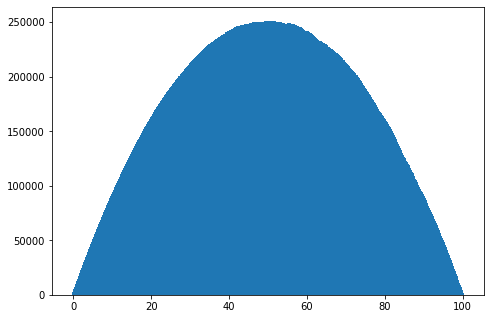

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(guess_list,solution_list)
plt.show()